NPV and Nominal Interest Sequencing

In [1]:
#Consider the following sequences of year-end returns:
returns1 = [20,15,10,10,5]
returns2 = [20,15,15,5,5]


In [2]:
#calculate NPV:
def NPV(amt, rate, years):
    denom_lst = []
    for i in range(years):
        denom = pow((1+rate),i+1)
        denom_lst.append(denom)
    total_lst = [float(a) / float(d) for a,d in zip(amt, denom_lst)]
    return round(sum(total_lst),2)

In [3]:
#Which sequence is preferable if the interest rate, compounded annually, is 4%?
r = .04
seq1 = NPV(returns1,r,len(returns1))
seq2 = NPV(returns2,r,len(returns2))

var = {seq1:"seq1",seq2:"seq2"}

print(var.get(max(var)), max(seq1,seq2))

seq2 54.82


Generate Interest Rates for a Sequence of Returns (future use for simulations)

In [4]:
import numpy as np
import pandas as pd

In [5]:
sequence_lst = [round(np.random.uniform(20,50),2) for i in range(10)]
print(sequence_lst)

[43.66, 47.85, 41.11, 27.2, 33.37, 23.69, 38.51, 28.16, 49.06, 23.35]


In [6]:
rate_lst = [np.random.uniform(0.029,0.059) for i in range(50)]
print(rate_lst)

[0.034050959527297295, 0.032001862255740504, 0.03289198481694666, 0.03436827420506381, 0.057343892946852076, 0.040116356174628574, 0.055432158395724435, 0.04318730462357433, 0.03674789864196558, 0.04958559884096653, 0.029579046648375917, 0.05700984323211746, 0.049301714733973045, 0.05772457681110887, 0.039883648946565625, 0.04555531430754785, 0.03624729156390141, 0.036268792286326144, 0.04457080159753289, 0.05580968013446436, 0.04018282357759802, 0.03309631498529958, 0.03630483612680946, 0.03328123671825009, 0.03904369909323815, 0.033122415470739734, 0.04373650708081289, 0.03824375727876263, 0.04858053933858287, 0.05411764709293013, 0.04605247546141914, 0.041134869726849585, 0.04642547931089348, 0.04727398878173455, 0.034347991314903834, 0.047850571557028675, 0.03654394745913822, 0.0467546135716367, 0.05314004310196014, 0.053372952497450346, 0.050187391533976465, 0.03278297577430762, 0.054196035516485726, 0.0522781497869543, 0.05474040292066683, 0.05733835279756838, 0.05471531083498673

In [7]:
npvlst = [NPV(sequence_lst,rt,len(sequence_lst)) for rt in rate_lst]

In [8]:
df = pd.DataFrame({'Interest_Rate': rate_lst, 'NPV': npvlst})

In [9]:
df.sort_values(by = 'Interest_Rate')

,Interest_Rate,NPV
10,0.029579,307.04
1,0.032002,303.50
41,0.032783,302.37
2,0.032892,302.22
21,0.033096,301.92
25,0.033122,301.88
23,0.033281,301.66
0,0.034051,300.56
34,0.034348,300.13
3,0.034368,300.10


Checking for Duplicates

In [10]:
duplicate = df[df.duplicated()]

In [11]:
duplicate

,Interest_Rate,NPV


Compare the Distributions

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as skm

In [13]:
df.describe()

,Interest_Rate,NPV
count,50.000000,50.000000
mean,0.044348,286.746000
std,0.008459,11.207267
min,0.029579,269.540000
25%,0.036365,276.870000
50%,0.045063,285.465000
75%,0.051755,297.285000
max,0.057725,307.040000


Histograms vs Kernel Density Estimators: https://towardsdatascience.com/histograms-vs-kdes-explained-ed62e7753f12

array([[<Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'NPV'}>]], dtype=object)

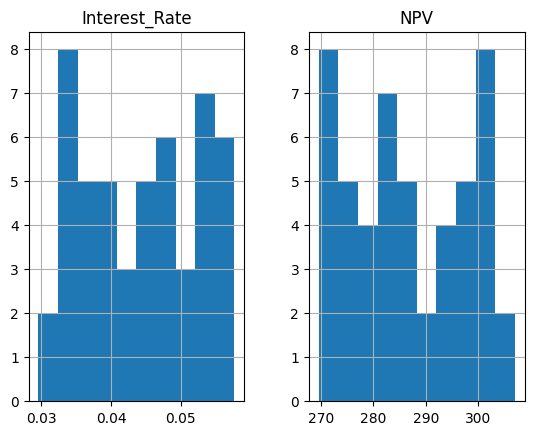

In [14]:
df.hist()

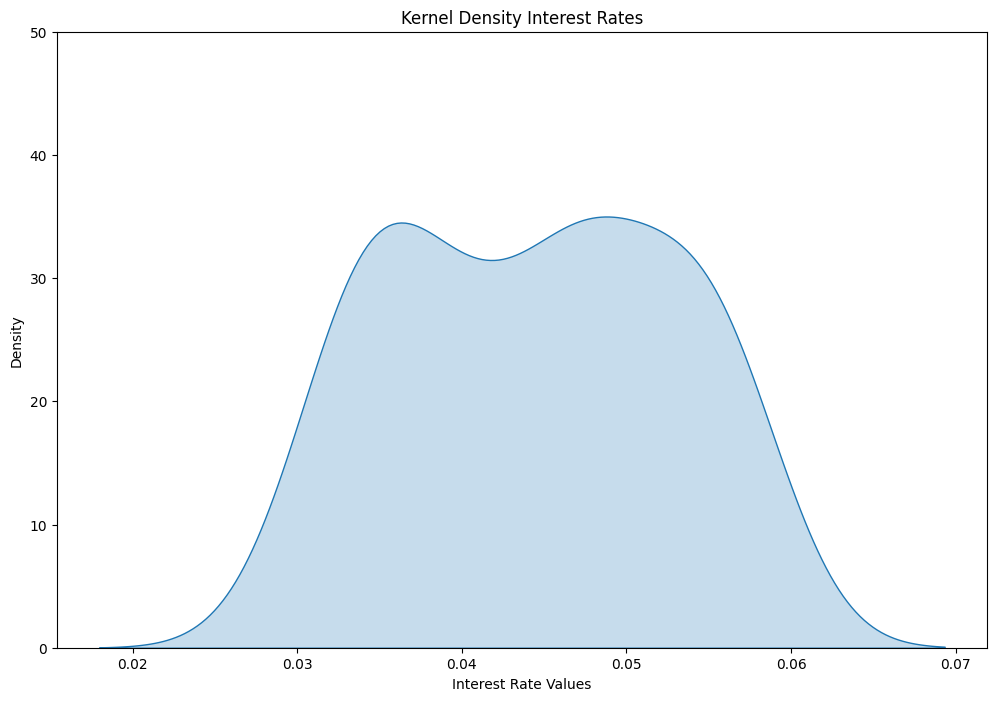

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.kdeplot(data=df, x='Interest_Rate', fill=True, ax=ax)
ax.set_title("Kernel Density Interest Rates")
ax.set_ylim(0.0, 50)
ax.set_xlabel('Interest Rate Values')
plt.show()

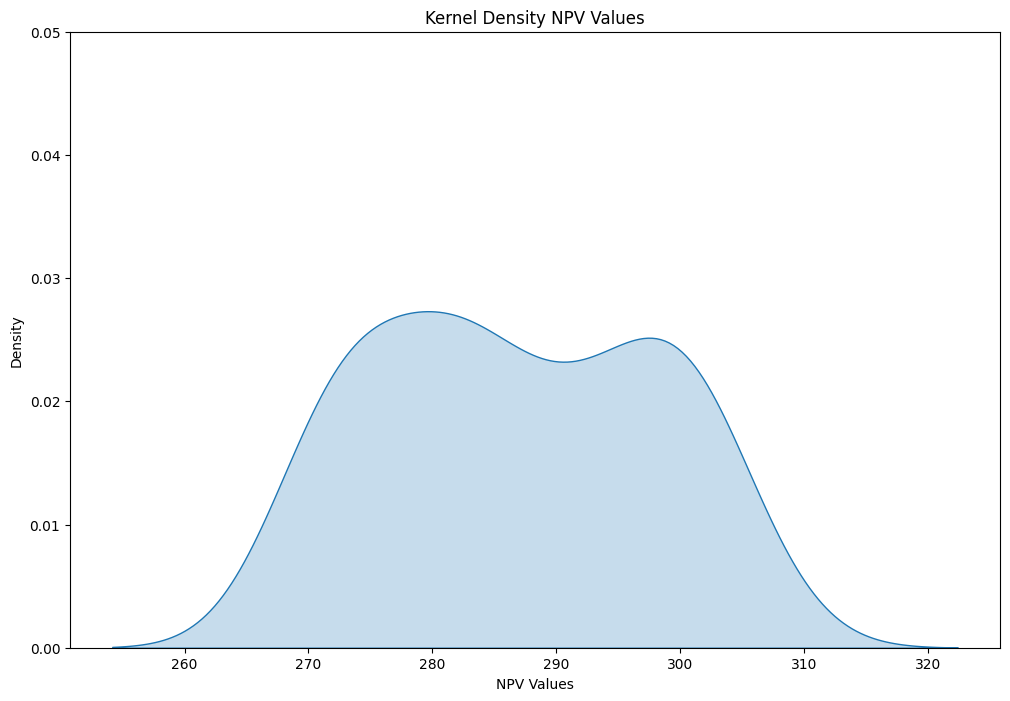

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.kdeplot(data=df, x='NPV', fill=True, ax=ax)
ax.set_title("Kernel Density NPV Values")
ax.set_ylim(0.0, 0.05)
ax.set_xlabel('NPV Values')
plt.show()